In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import json

# Hotel Review Data

In [ ]:
df = pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv', delimiter=',')
print('There are {} rows and {} columns'.format(df.shape[0], df.shape[1]))

There are 10000 rows and 26 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateAdded   

In [ ]:
df=df[['postalCode', 'reviews.rating']]
df.head()

postalCode  reviews.rating
0      93117               3
1      93921               4
2      93921               3
3      93921               5
4      93921               2

Rating distribution

<AxesSubplot: xlabel='reviews.rating', ylabel='count'>

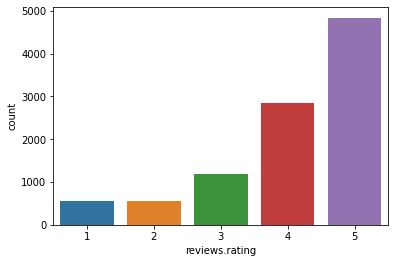

In [ ]:
# rating distribution
sns.countplot(x='reviews.rating', data=df)
# df['reviews.rating'].plot.hist()

In [ ]:
df['postalCode'] = df['postalCode'].apply(lambda s: s[:5])
df['postalCode'].value_counts()

96815         305
94102         288
92108         228
98109-5093    209
60601         186
             ... 
63146           1
56308           1
98383           1
17325           1
75771           1
Name: postalCode, Length: 1149, dtype: int64

Transform city to state rating

In [ ]:
lstCityPostalCode = list(df['postalCode'].unique())

In [ ]:
# From zip code to State Full name
# source: https://www.geonames.org/
# headers = {
#     "user-agent": "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36"
# }
# dictCodeToState = {}
# i = 0
# for code in lstCityPostalCode:
#     print('Getting {}'.format(i), end='\r')
#     i += 1
#     url = 'https://www.geonames.org/postalcode-search.html?q={}&country=US'.format(code)
#     res = requests.get(url, headers=headers)
#     soup = BeautifulSoup(res.text, 'lxml')
#     content = soup.select('table .restable > tr > td')
#     if len(content) > 5:
#         dictCodeToState[code] = content[4].text
        
# dictCodeToState

In [ ]:
# save code to state data to json file
# with open('citycodeToState.json', 'w') as fp:
#     json.dump(dictCodeToState, fp, indent=4)

1116

In [ ]:
# The crawl process is too slow, so we load from the result file.
with open('citycodeToState.json', 'r') as fp:
    dictCodeToState = json.load(fp)

In [ ]:
df['State'] = df['postalCode'].map(dictCodeToState)

In [ ]:
df.head()

postalCode  reviews.rating       State
0      93117               3  California
1      93921               4  California
2      93921               3  California
3      93921               5  California
4      93921               2  California

Average rating for state

In [ ]:
dfRatings = df.groupby('State', as_index=False)['reviews.rating'].mean()
dfRatings.head()

State  reviews.rating
0     Alabama        4.301587
1      Alaska        4.500000
2     Arizona        4.057377
3    Arkansas        3.795455
4  California        3.999622

In [ ]:
print('Max state rating: '.format(dfRatings['reviews.rating'].max()))
print('Min state rating: '.format(dfRatings['reviews.rating'].min()))
print('Mean state rating: '.format(dfRatings['reviews.rating'].mean()))
print('Standard deviation of state rating: '.format(dfRatings['reviews.rating'].std()))

Max state rating: 
Min state rating: 
Mean state rating: 
Standard deviation of state rating: 


In [2]:
#update
print('Max state rating: {:.2f}'.format(dfRatings['reviews.rating'].max()))
print('Min state rating: {:.2f}'.format(dfRatings['reviews.rating'].min()))
print('Mean state rating: {:.2f}'.format(dfRatings['reviews.rating'].mean()))
print('Standard deviation of state rating: {:.2f}'.format(dfRatings['reviews.rating'].std()))

NameError: ignored

# Trip data

Crawl two letter state to full state name data

In [ ]:
# From two letter state name to full name
# https://www.faa.gov/air_traffic/publications/atpubs/cnt_html/appendix_a.html
headers = {
    "user-agent": "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36"
}
url = 'https://www.faa.gov/air_traffic/publications/atpubs/cnt_html/appendix_a.html'
res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, 'lxml')
content = soup.select('tr > td')

In [ ]:
dictTwoToFull = {}
i = len(content) - 1
while i > 0:
    dictTwoToFull[content[i].text.strip()] = content[i-1].text.strip()
    i -= 2
dictTwoToFull


{'WY': 'Wyoming',
 'MP': 'Northern Mariana Islands',
 'KS': 'Kansas',
 'WI': 'Wisconsin',
 'ND': 'North Dakota',
 'IA': 'Iowa',
 'WV': 'West Virginia',
 'NC': 'North Carolina',
 'IN': 'Indiana',
 'WA': 'Washington',
 'NY': 'New York',
 'IL': 'Illinois',
 'VI': 'Virgin Islands',
 'NM': 'New Mexico',
 'ID': 'Idaho',
 'VA': 'Virginia',
 'NJ': 'New Jersey',
 'HI': 'Hawaii',
 'VT': 'Vermont',
 'NH': 'New Hampshire',
 'GU': 'Guam',
 'UT': 'Utah',
 'NV': 'Nevada',
 'GA': 'Georgia',
 'TT': 'Trust Territories',
 'NE': 'Nebraska',
 'FL': 'Florida',
 'TX': 'Texas',
 'MT': 'Montana',
 'DC': 'District of Columbia',
 'TN': 'Tennessee',
 'MO': 'Missouri',
 'DE': 'Delaware',
 'SD': 'South Dakota',
 'MS': 'Mississippi',
 'CT': 'Connecticut',
 'SC': 'South Carolina',
 'MN': 'Minnesota',
 'CO': 'Colorado',
 'RI': 'Rhode Island',
 'MI': 'Michigan',
 'CA': 'California',
 'PR': 'Puerto Rico',
 'MA': 'Massachusetts',
 'AS': 'American Samoa',
 'PA': 'Pennsylvania',
 'MD': 'Maryland',
 'AR': 'Arkansas',
 'OR':

Read trip data

In [ ]:
dfTrips = pd.read_csv('State_trips.csv', index_col=0)
dfTrips.head(5)

Level        Date State Postal Code Population Staying at Home  \
0  State  2019/01/01                NV                    753,054   
1  State  2019/01/01                FL                  4,524,666   
2  State  2019/01/01                DC                    241,030   
3  State  2019/01/01                DE                    224,457   
4  State  2019/01/01                CT                    853,894   

  Population Not Staying at Home Number of Trips Number of Trips <1  \
0                      2,272,063       9,139,676          2,999,886   
1                     16,709,556      55,258,300         16,036,792   
2                        459,278       3,114,055          1,314,825   
3                        739,757       2,420,942            584,323   
4                      2,707,851       9,468,961          2,375,021   

  Number of Trips 1-3 Number of Trips 3-5 Number of Trips 5-10  \
0           2,181,216           1,039,500            1,378,024   
1          14,469,767           6,658,624            7,977,612   
2             833,796             367,547              344,116   
3             640,348             305,441              370,359   
4           2,618,933           1,189,575            1,331,356   

  Number of Trips 10-25 Number of Trips 25-50 Number of Trips 50-100  \
0             1,108,436               222,837                 93,301   
1             6,604,304             2,113,009                796,740   
2               183,744                42,096                 10,730   
3               314,102               128,454                 50,542   
4             1,211,252               449,947                192,960   

  Number of Trips 100-250 Number of Trips 250-500 Number of Trips >=500  \
0                  73,578                  24,471                18,427   
1                 412,224                  95,341                93,887   
2                   8,109                   3,476                 5,616   
3                  22,701                   2,474                 2,198   
4                  56,618                  12,031                31,268   

              Row ID  Week  Month  
0  32-00000-20190101     0      1  
1  12-00000-20190101     0      1  
2  11-00000-20190101     0      1  
3  10-00000-20190101     0      1  
4  09-00000-20190101     0      1

Get only the large trip that is greater than 25.

Map the two letter state to full state name.

In [ ]:
dfTrips = dfTrips[['State Postal Code', 'Number of Trips 25-50', 'Number of Trips 50-100', 'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500']]
dfTrips['State'] = dfTrips['State Postal Code'].map(dictTwoToFull)
dfTrips['25-50'] = dfTrips['Number of Trips 25-50'].str.replace(r',', '').astype(int)
dfTrips['50-100'] = dfTrips['Number of Trips 50-100'].str.replace(r',', '').astype(int)
dfTrips['100-250'] = dfTrips['Number of Trips 100-250'].str.replace(r',', '').astype(int)
dfTrips['250-500'] = dfTrips['Number of Trips 250-500'].str.replace(r',', '').astype(int)
dfTrips['Above500'] = dfTrips['Number of Trips >=500'].str.replace(r',', '').astype(int)
dfTrips.drop(columns=['Number of Trips 25-50', 'Number of Trips 50-100', 'Number of Trips 100-250', 'Number of Trips 250-500', 'Number of Trips >=500'], inplace=True)
dfTrips.head()

State Postal Code                 State    25-50  50-100  100-250  250-500  \
0                NV                Nevada   222837   93301    73578    24471   
1                FL               Florida  2113009  796740   412224    95341   
2                DC  District of Columbia    42096   10730     8109     3476   
3                DE              Delaware   128454   50542    22701     2474   
4                CT           Connecticut   449947  192960    56618    12031   

   Above500  
0     18427  
1     93887  
2      5616  
3      2198  
4     31268

In [ ]:
# calculate the total trip number
dfTrips['total'] = dfTrips['25-50']+dfTrips['50-100']+dfTrips['100-250']+dfTrips['250-500']+dfTrips['Above500']

In [ ]:
# mean trip for each state
dfStateTrips = dfTrips.groupby('State', as_index=False)['total'].mean()
dfStateTrips.head()

State         total
0     Alabama  1.403595e+06
1      Alaska  1.786771e+05
2     Arizona  1.752203e+06
3    Arkansas  8.857997e+05
4  California  1.010170e+07

# Merge rating data and trip data

In [ ]:
dfMerged = pd.merge(left=dfRatings, right=dfStateTrips, how='inner', on='State')
dfMerged.head()

State  reviews.rating         total
0     Alabama        4.301587  1.403595e+06
1      Alaska        4.500000  1.786771e+05
2     Arizona        4.057377  1.752203e+06
3    Arkansas        3.795455  8.857997e+05
4  California        3.999622  1.010170e+07

<AxesSubplot: xlabel='total', ylabel='reviews.rating'>

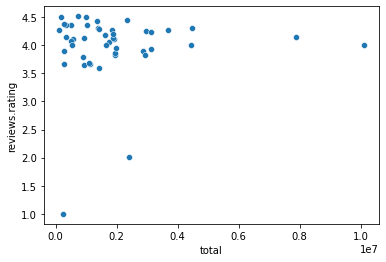

In [ ]:
sns.scatterplot(x='total', y='reviews.rating', data=dfMerged)

<AxesSubplot: xlabel='total', ylabel='reviews.rating'>

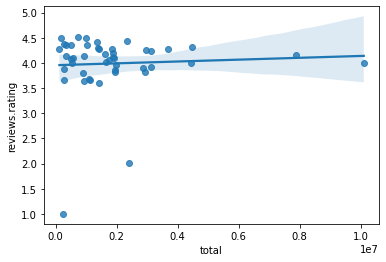

In [ ]:
sns.regplot(x='total', y='reviews.rating', data = dfMerged)

In [ ]:
import statsmodels.api as sm
ols_results = sm.OLS(dfMerged['reviews.rating'], dfMerged['total']).fit()
print(ols_results.summary())
print(ols_results.params)


                                 OLS Regression Results                                
Dep. Variable:         reviews.rating   R-squared (uncentered):                   0.496
Model:                            OLS   Adj. R-squared (uncentered):              0.484
Method:                 Least Squares   F-statistic:                              44.20
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                    3.39e-08
Time:                        12:38:37   Log-Likelihood:                         -113.68
No. Observations:                  46   AIC:                                      229.4
Df Residuals:                      45   BIC:                                      231.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------